## Visualizing stock price with matplotlib

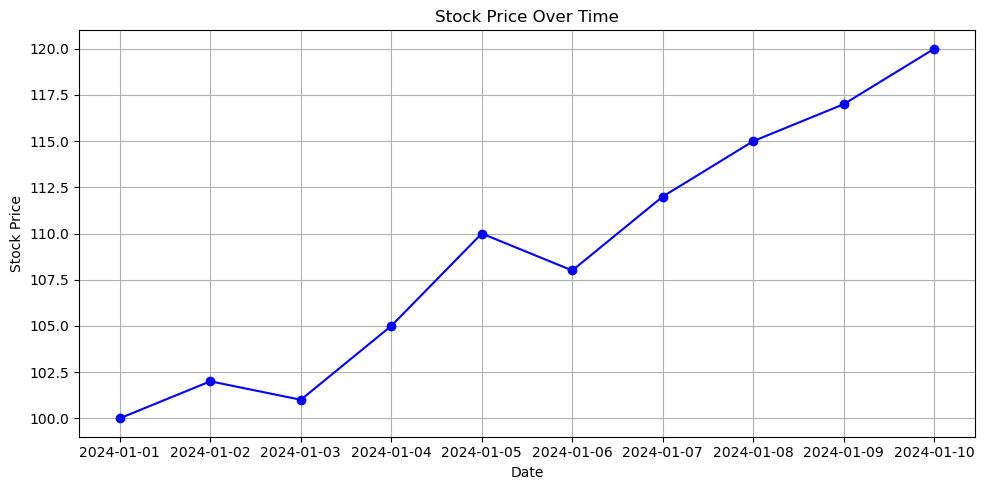

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample time series data
data = {
    'Date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Stock_Price': [100, 102, 101, 105, 110, 108, 112, 115, 117, 120]
}

df = pd.DataFrame(data)
df.set_index('Date',inplace = True)

#Plotting
plt.figure(figsize=(10,5))
plt.plot(df.index,df['Stock_Price'],marker='o',linestyle='-',color='blue')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.tight_layout()
plt.show()

## Create lag features using Pandas

In [5]:
data = {
    'Date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Stock_Price': [100, 102, 101, 105, 110, 108, 112, 115, 117, 120]
}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

#create lag features
df['lag_1'] = df['Stock_Price'].shift(1)
df['lag_2'] = df['Stock_Price'].shift(2)
print(df)

            Stock_Price  lag_1  lag_2
Date                                 
2024-01-01          100    NaN    NaN
2024-01-02          102  100.0    NaN
2024-01-03          101  102.0  100.0
2024-01-04          105  101.0  102.0
2024-01-05          110  105.0  101.0
2024-01-06          108  110.0  105.0
2024-01-07          112  108.0  110.0
2024-01-08          115  112.0  108.0
2024-01-09          117  115.0  112.0
2024-01-10          120  117.0  115.0


## Implement basic RNN and LSTM model using Keras

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,LSTM,Dense

x = np.linspace(0,100,1000)
y = np.sin(x)

sequence_length = 50
X = []
Y = []

for i in range(len(y)- sequence_length):
    X.append(y[i:i+sequence_length])
    Y.append(y[i+sequence_length])

X = np.array(X)
Y = np.array(Y)

X = X.reshape((X.shape[0],X.shape[1],1))

## Basic RNN Model

In [15]:
model_rnn = Sequential([
    SimpleRNN(50,activation='tanh',input_shape=(sequence_length,1)),
    Dense(1)
])
model_rnn.compile(optimizer='adam',loss='mse')
model_rnn.summary()

C:\Users\punny\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

## LSTM Model

In [20]:
model_lstm = Sequential([
    LSTM(50,activation='tanh',input_shape=(sequence_length,1)),
    Dense(1)
])

model_lstm.compile(optimizer='adam',loss='mse')
model_lstm.summary()

C:\Users\punny\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

## Train and Evaluate

In [25]:
model_rnn.fit(X,Y,epochs=10,batch_size=32,verbose=1)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.4110e-06
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.3523e-06
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.1297e-06
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.6412e-07
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 8.5611e-07
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.3907e-07
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.2631e-07
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.1082e-07
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.4825e-07
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.7166e-07


In [27]:
model_lstm.fit(X,Y,epochs=10,batch_size=32,verbose=1)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 1.3644e-06
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 7.8001e-07
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 6.4135e-07
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 7.4004e-07
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 6.4236e-07
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 5.6552e-07
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 5.8369e-07
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 7.3752e-07
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 5.5483e-07
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 5.5066e-07


## Predict and Visualize

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


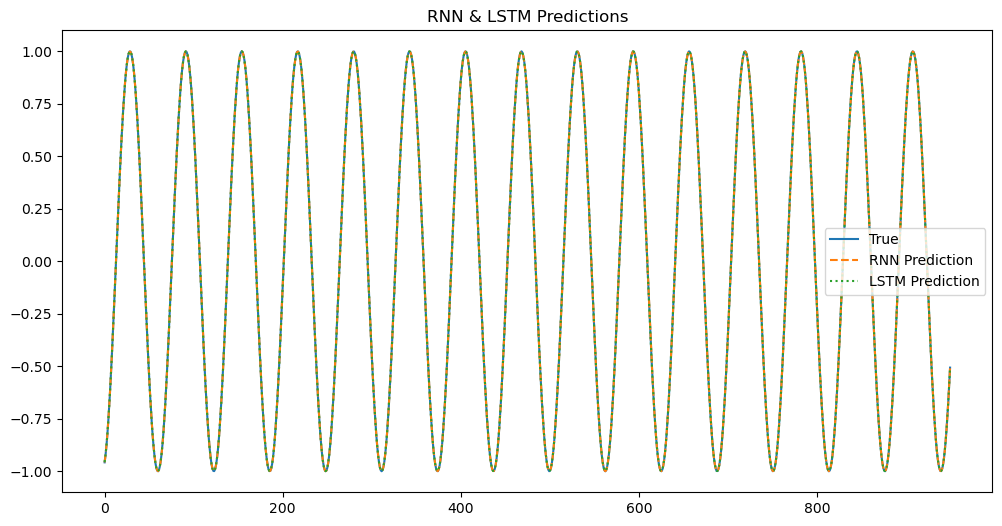

In [32]:
pred_rnn = model_rnn.predict(X)
pred_lstm = model_lstm.predict(X)

plt.figure(figsize=(12,6))
plt.plot(Y,label='True')
plt.plot(pred_rnn,label='RNN Prediction',linestyle='--')
plt.plot(pred_lstm,label='LSTM Prediction',linestyle=':')
plt.legend()
plt.title('RNN & LSTM Predictions')
plt.show()

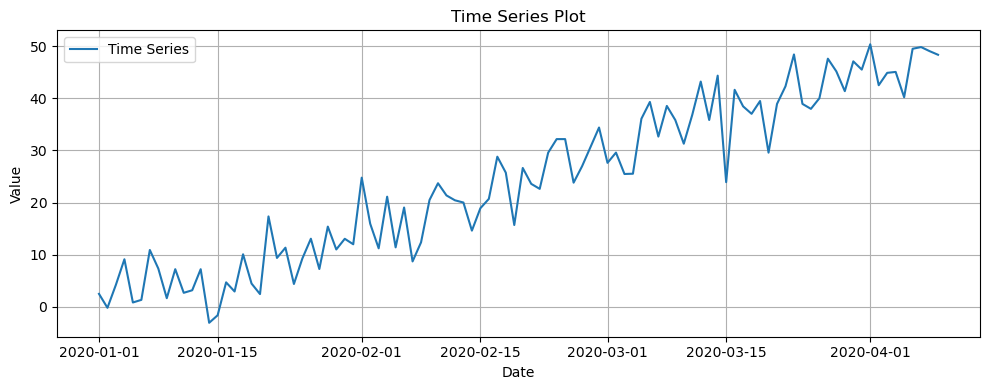

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate date range
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')

# Simulate a non-stationary time series (trend + noise)
np.random.seed(42)
data = 0.5 * np.arange(100) + np.random.normal(loc=0.0, scale=5.0, size=100)

# Create DataFrame
df = pd.DataFrame({'Date': dates, 'Value': data})
df.set_index('Date', inplace=True)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(df, label='Time Series')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


From this plot alone:

- The upward trend shows that the mean is not constant over time.

- There may also be a slight increase in variability as values increase.

- this time series is not stationary based on visual inspection.

- Next Steps to Confirm Statistically

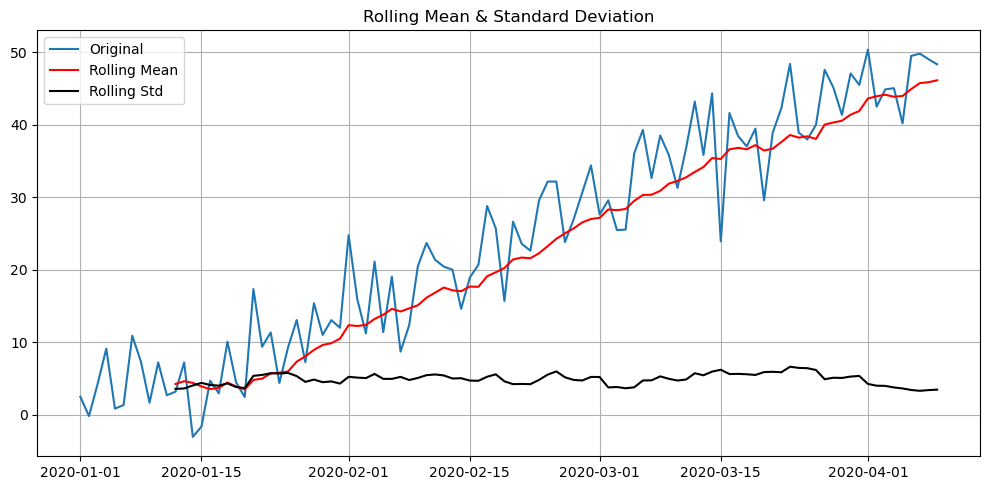

In [8]:
# to check if the time series is stationary or not
rolling_mean = df['Value'].rolling(window=12).mean()
rolling_std = df['Value'].rolling(window=12).std()
# Plot original, rolling mean and rolling std
plt.figure(figsize=(10, 5))
plt.plot(df['Value'], label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
#ho = series is non stationary
#h1 = series is stationary
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['Value'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -0.15026113477284025
p-value: 0.9441964694670334
Critical Values:
   1%: -3.5011373281819504
   5%: -2.8924800524857854
   10%: -2.5832749307479226


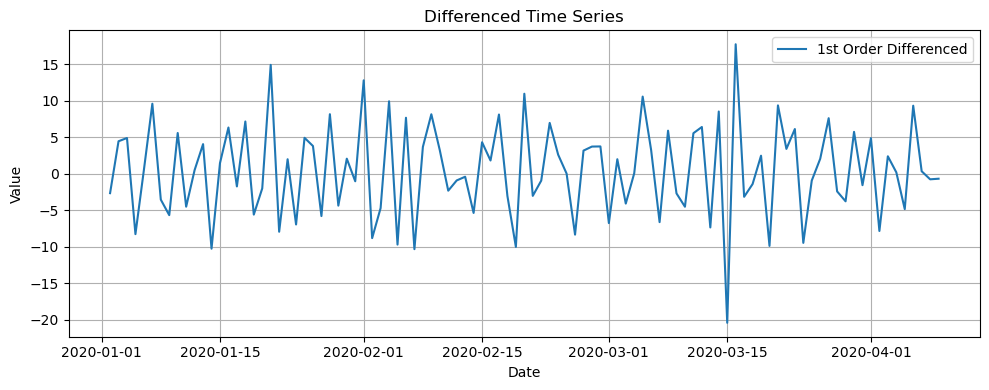

ADF Statistic (Differenced): -5.194567863079881
p-value: 9.019393985741968e-06
Critical Values:
   1%: -3.506057133647011
   5%: -2.8946066061911946
   10%: -2.5844100201994697


In [12]:
# Apply first-order differencing
df_diff = df['Value'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 4))
plt.plot(df_diff, label='1st Order Differenced')
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ADF test on differenced data
adf_result_diff = adfuller(df_diff)

print("ADF Statistic (Differenced):", adf_result_diff[0])
print("p-value:", adf_result_diff[1])
print("Critical Values:")
for key, value in adf_result_diff[4].items():
    print(f'   {key}: {value}')


## Univariate LSTM Model

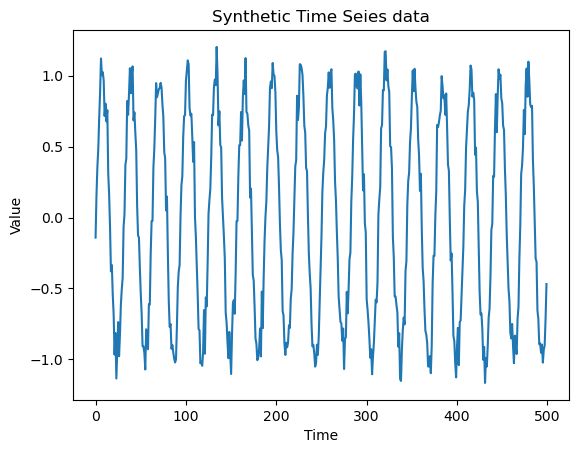

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

x = np.linspace(0, 100, 500)
data = np.sin(x) + 0.1 * np.random.normal(size=len(x)) 

plt.plot(data)
plt.title('Synthetic Time Seies data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [17]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1,1))

In [23]:
def create_sequence(data,time_steps):
    X,y =[],[]
    for i in range(len(data)-time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X),np.array(y)

time_steps=10
X,y = create_sequence(data,time_steps)

# Reshape for LSTM: [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

In [25]:
split = int(len(X)*0.8)
X_train ,X_test =X[:split],X[split:]
y_train,y_test = y[:split],y[split:]

In [27]:
model = Sequential()
model.add(LSTM(50,activation='relu',input_shape=(time_steps,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
history = model.fit(X_train,y_train,epochs=20,batch_size=16,validation_data=(X_test,y_test))
          

C:\Users\punny\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2347 - val_loss: 0.0720
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0699 - val_loss: 0.0518
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0526 - val_loss: 0.0410
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0377 - val_loss: 0.0246
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0183 - val_loss: 0.0042
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0053 - val_loss: 0.0036
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0044 - val_loss: 0.0030
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0039 - val_loss: 0.0028
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0

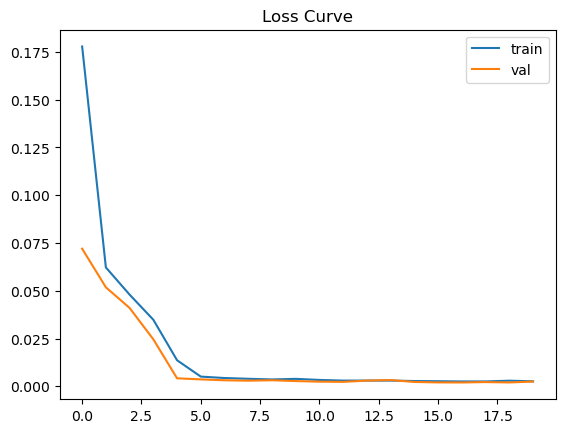

In [29]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss Curve")
plt.legend()
plt.show()


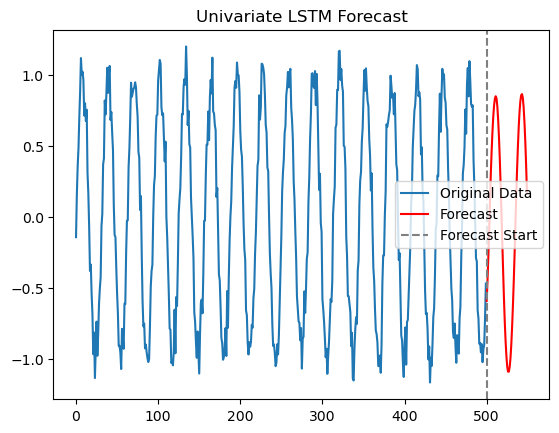

In [38]:
# Start with the last observed window
input_seq = X_test[-1]  # shape (time_steps, 1)

# Predict next 50 values
future_predictions = []
for _ in range(50):
    pred = model.predict(input_seq.reshape(1, time_steps, 1), verbose=0)
    future_predictions.append(pred[0, 0])
    # Shift window and append prediction
    input_seq = np.append(input_seq[1:], [[pred[0,0]]], axis=0)

# Inverse transform to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot
plt.plot(scaler.inverse_transform(data), label='Original Data')
plt.plot(np.arange(len(data), len(data) + 50), future_predictions, label='Forecast', color='red')
plt.axvline(x=start_index, linestyle='--', color='gray', label='Forecast Start')
plt.legend()
plt.title("Univariate LSTM Forecast")
plt.show()


In [43]:
!pip install yfinance

In [45]:
import yfinance as yf
import pandas as pd

df = yf.download('AAPL',start = '2018-01-01',end = '2023-12-31')
df = df[['Open','High','Low','Close','Volume']]
df.dropna(inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data =scaler.fit_transform(df)


In [49]:
import numpy as np

def create_sequence(data,time_steps=60):
    X,y =[],[]
    for i in range(len(data)- time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps,3])
    return np.array(X),np.array(y)

time_steps=60
X,y = create_sequence(scaled_data,time_steps)

In [51]:
split =int(0.8*len(X))
X_train ,X_test = X[:split],X[split:]
y_train,y_test = y[:split],y[split:]

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense

model =Sequential([
    LSTM(100,return_sequences=False,input_shape=(X_train.shape[1],X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100)                 │          42,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,501 (166.02 KB)

 Trainable params: 42,501 (166.02 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.0472 - val_loss: 0.0021
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0025 - val_loss: 8.0321e-04
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0020 - val_loss: 9.9035e-04
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0018 - val_loss: 9.1853e-04
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0018 - val_loss: 8.1295e-04
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0015 - val_loss: 6.9811e-04
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0014 - val_loss: 6.3659e-04
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0013 - val_loss: 6.1308e-04
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━

In [61]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [63]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', 50, 200, step=50),
                   input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(Dense(1))
    
    model.compile(
        optimizer='adam',
        loss='mean_squared_error'
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='lstm_tuning',
    project_name='stock_forecast'
)

tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Trial 5 Complete [00h 02m 14s]
val_loss: 0.0004934050375595689

Best val_loss So Far: 0.0004934050375595689
Total elapsed time: 00h 07m 08s
